<div style="text-align: center;">
    <img src="https://storage.googleapis.com/kaggle-datasets-images/3313212/5764059/077c4ffbc888b5276a063902b71ee0a4/dataset-cover.jpeg?t=2023-07-11-07-06-43" alt="image" width="1200" height="50">
</div>

# Superstore Exploratory Data Analysis


the dataset we analysis for superstore with some features like products, regions, categories and customer segments they should target or avoid.  
the features in the dataset is   
  
`Row ID` => Unique ID for each row.  
`Order ID` => Unique Order ID for each Customer.  
`Order Date` => Order Date of the product.  
`Ship Date` => Shipping Date of the Product.  
`Ship Mode` => Shipping Mode specified by the Customer.  
`Customer` ID => Unique ID to identify each Customer.  
`Customer` Name => Name of the Customer.  
`Segment` => The segment where the Customer belongs.  
`Country` => Country of residence of the Customer.  
`City` => City of residence of of the Customer.  
`State` => State of residence of the Customer.  
`Postal` Code => Postal Code of every Customer.  
`Region` => Region where the Customer belong.  
`Product` ID => Unique ID of the Product.  
`Category` => Category of the product ordered.  
`Sub-Category` => Sub-Category of the product ordered.  
`Product` Name => Name of the Product  
`Sales` => Sales of the Product.  
`Quantity` => Quantity of the Product.  
`Discount` => Discount provided.  
`Profit` => Profit/Loss incurred.  



## Import Libraies

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# let's import the libraries we will use

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time

import warnings
warnings.filterwarnings('ignore')

let't read the data 
the data has one file ___Sample - Superstore.csv___

In [185]:
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')
# df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252')

let't print the first 5 row in the data

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Dataset Info

In [4]:
df.shape

(9994, 21)

the shape tell us that there is 21 column and there 9994 in this data

let't print some information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

tha data set has 21 int column and 3 float and 15 string   
and print the count of non null values is 9994 of all the columns

the row id column is useless and not add values so we will drop it 

In [6]:
df.drop(columns=['Row ID'], inplace = True )

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


this print some statistical information about the numerical data such mean and std and first,second and third quartile and the max value 


let't print the Skewness of the columns

In [8]:
numeric_df = df.select_dtypes(include=['number'])

skewness = numeric_df.skew()
print(skewness)

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64


the skewness tell us about the symeetrical distrubtial  
if skewness is 0 iths symeetric distribution  
if skewness is negative it left symeetrical  
if skewness is positive it right symeetrical  
the sales and profit (target) is positive skewness that may mean there is raise in the sales and profit   

In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

we will change the type of order date and ship date from object to date

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print(df['Order Date'].dtype,df['Ship Date'].dtype)

datetime64[ns] datetime64[ns]


### Null Values

let't check the null vlues 

In [11]:
df.isna().sum().sum()

np.int64(0)

there is no missing values thats greate we do'nt want to handle the null values 

## Features Analysis 

### Ship Date & Order Date

In [12]:
ship_date_sales  = df.groupby(['Ship Date'])['Sales'].sum().reset_index()
ship_date_profit = df.groupby(['Ship Date'])['Profit'].sum().reset_index()

print(ship_date_sales)
print()
print(ship_date_profit)

      Ship Date      Sales
0    2014-01-07    29.2280
1    2014-01-08   307.5000
2    2014-01-10  4374.8800
3    2014-01-12   106.6940
4    2014-01-13    40.5440
...         ...        ...
1329 2018-01-01  2390.1548
1330 2018-01-02  1545.6240
1331 2018-01-03   569.2740
1332 2018-01-04   344.2240
1333 2018-01-05   310.4200

[1334 rows x 2 columns]

      Ship Date     Profit
0    2014-01-07    10.7910
1    2014-01-08   -56.6589
2    2014-01-10  1343.4814
3    2014-01-12   -67.0781
4    2014-01-13    10.9180
...         ...        ...
1329 2018-01-01   416.0752
1330 2018-01-02   235.6304
1331 2018-01-03    32.0687
1332 2018-01-04   157.0897
1333 2018-01-05    93.9254

[1334 rows x 2 columns]


In [13]:
ship_date_sales['Month'] = ship_date_sales['Ship Date'].dt.to_period('M')
ship_date_profit['Month'] = ship_date_profit['Ship Date'].dt.to_period('M')

ship_date_sales = ship_date_sales.drop_duplicates(subset='Month')
ship_date_profit = ship_date_profit.drop_duplicates(subset='Month')

ship_date_sales = ship_date_sales.drop(columns='Month')
ship_date_profit = ship_date_profit.drop(columns='Month')

# print(ship_date_sales, end='\n\n')
# print(ship_date_profit)

print(ship_date_sales.shape)
print(ship_date_profit.shape)


(49, 2)
(49, 2)


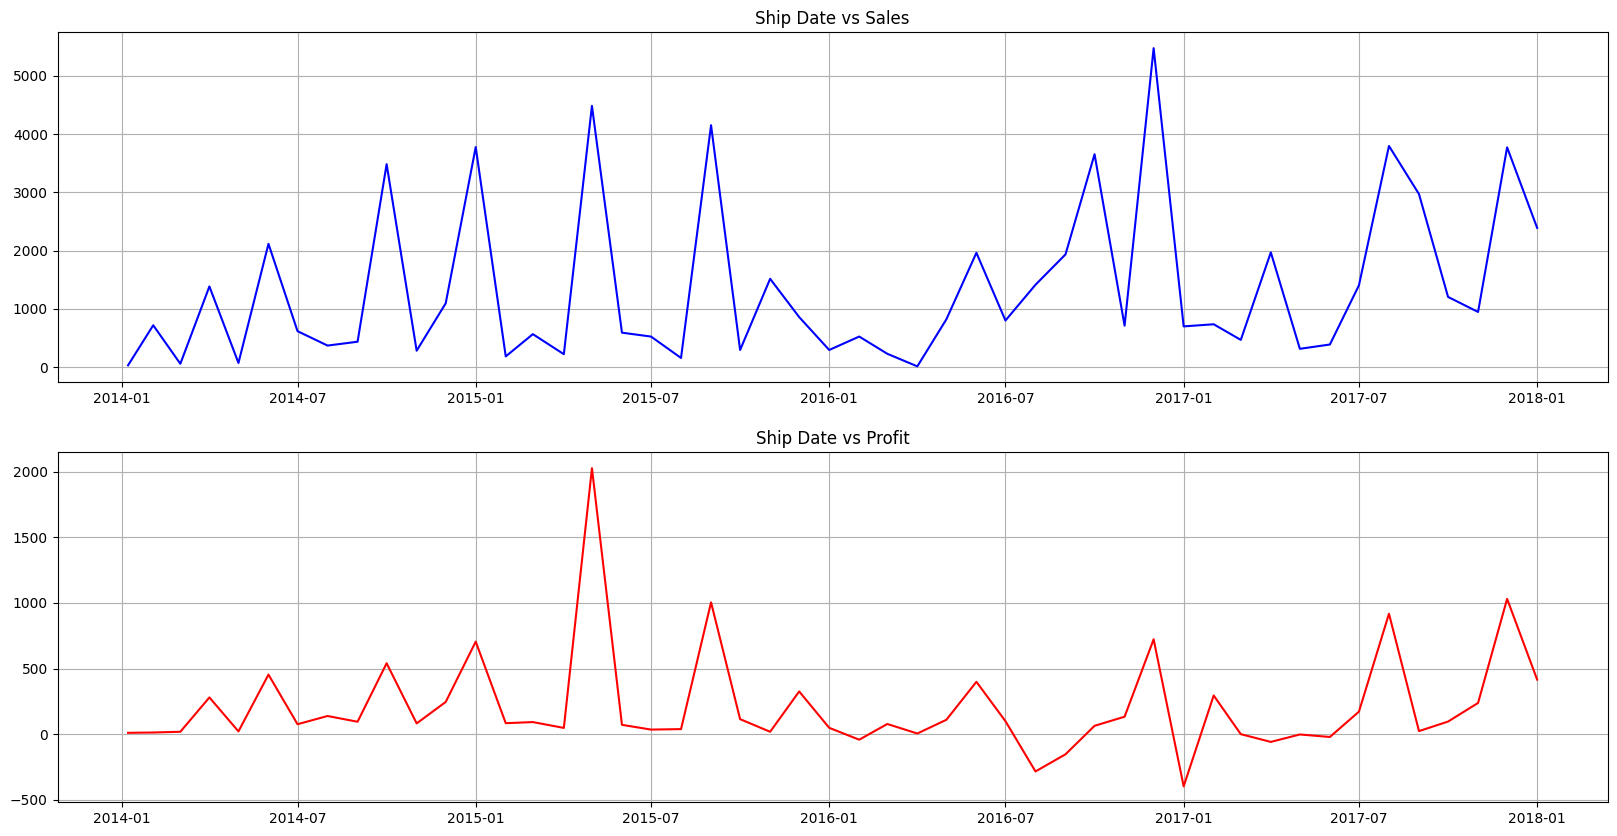

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

axes[0].plot(ship_date_sales['Ship Date'], ship_date_sales['Sales'], color='blue')
axes[0].set_title('Ship Date vs Sales')
axes[0].grid(True)

axes[1].plot(ship_date_profit['Ship Date'], ship_date_profit['Profit'], color='red')
axes[1].set_title('Ship Date vs Profit')
axes[1].grid(True)

plt.show()


The figure for the Sales and profit from 2014-1 to 2018-1  
in the begging the Sales and profit was low and it start grow untill the best Sales ware from 2014-9 to 2014-8   
and in 2017 was the highest in sales but the profit was in average it maybe because discount  
and the highst cerve in profit was in about 2015-5 and 2015-6

let's do the same with Order Date

In [15]:
order_date_sales  = df.groupby(['Order Date'])['Sales'].sum().reset_index()
order_date_profit = df.groupby(['Order Date'])['Profit'].sum().reset_index()

print(order_date_sales)
print()
print(order_date_profit)

     Order Date      Sales
0    2014-01-03    16.4480
1    2014-01-04   288.0600
2    2014-01-05    19.5360
3    2014-01-06  4407.1000
4    2014-01-07    87.1580
...         ...        ...
1232 2017-12-26   814.5940
1233 2017-12-27   177.6360
1234 2017-12-28  1657.3508
1235 2017-12-29  2915.5340
1236 2017-12-30   713.7900

[1237 rows x 2 columns]

     Order Date     Profit
0    2014-01-03     5.5512
1    2014-01-04   -65.9901
2    2014-01-05     4.8840
3    2014-01-06  1358.0524
4    2014-01-07   -71.9621
...         ...        ...
1232 2017-12-26    61.1202
1233 2017-12-27   -31.9742
1234 2017-12-28   253.1188
1235 2017-12-29   644.4338
1236 2017-12-30   101.5365

[1237 rows x 2 columns]


In [16]:
order_date_sales['Month'] = order_date_sales['Order Date'].dt.to_period('M')
order_date_profit['Month'] = order_date_profit['Order Date'].dt.to_period('M')

order_date_sales = order_date_sales.drop_duplicates(subset='Month')
order_date_profit = order_date_profit.drop_duplicates(subset='Month')

order_date_sales = order_date_sales.drop(columns='Month')
order_date_profit = order_date_profit.drop(columns='Month')

# print(order_date_sales, end='\n\n')
# print(order_date_profit)

print(order_date_sales.shape)
print(order_date_profit.shape)


(48, 2)
(48, 2)


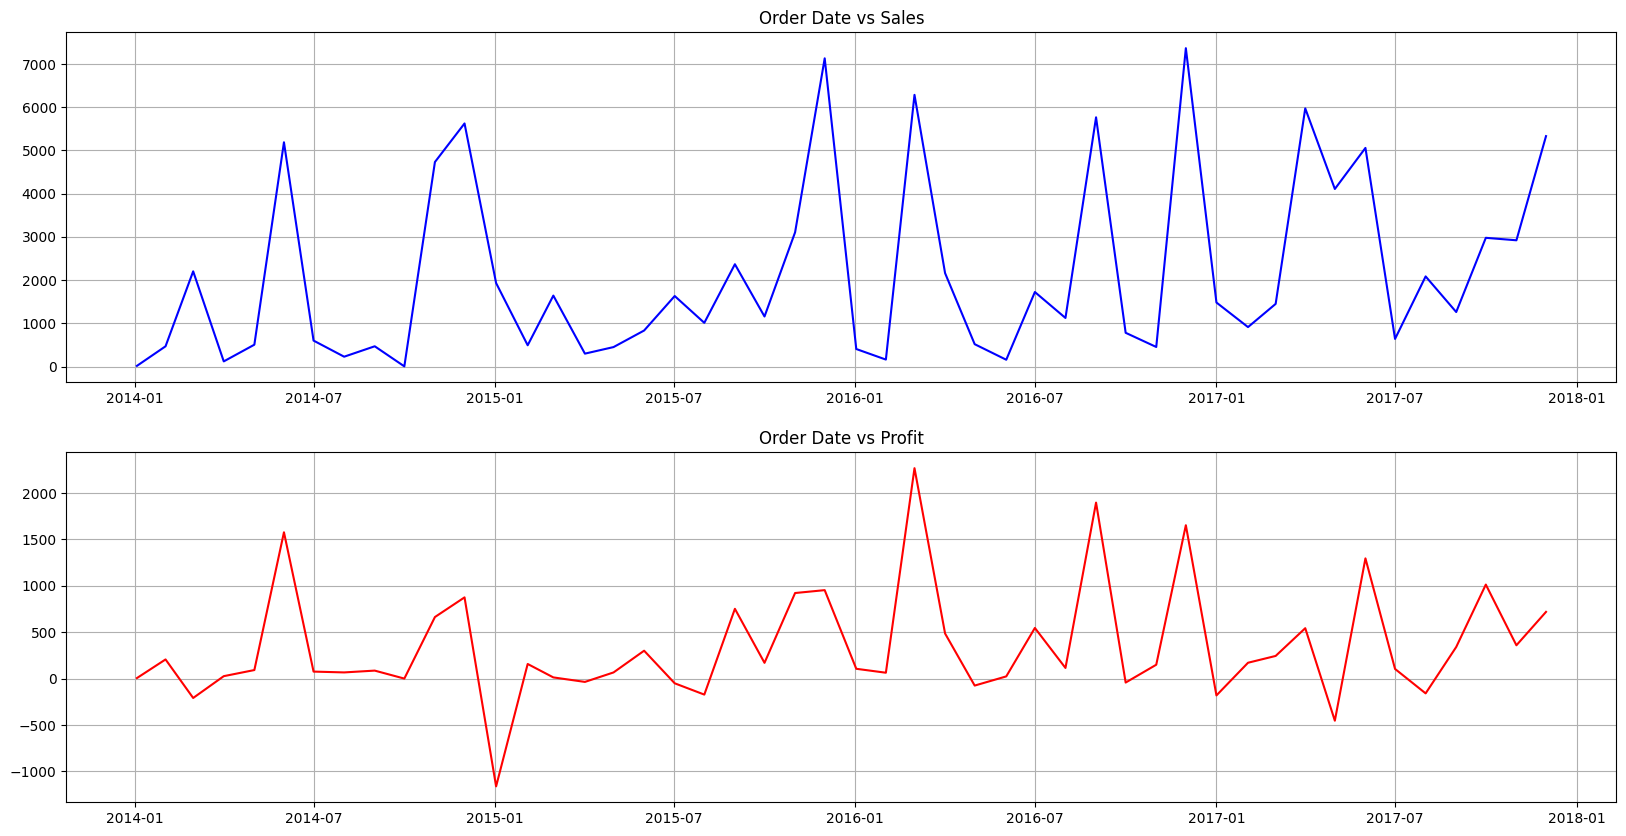

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

axes[0].plot(order_date_sales['Order Date'], order_date_sales['Sales'], color='blue')
axes[0].set_title('Order Date vs Sales')
axes[0].grid(True)

axes[1].plot(order_date_profit['Order Date'], order_date_profit['Profit'], color='red')
axes[1].set_title('Order Date vs Profit')
axes[1].grid(True)

plt.show()


the figure show the Extreme fluctuations in sales and profit among the The five years  
but from 2015-10 to 2018 in the most time there was ver good sales and profit  
there is a big profit loss in 2015-1 the store loss about 1000 althoug the sales waren't by this bad  
maybe there was Financial disaster or high discount

### Segment Analysis

In [18]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [19]:
df['Segment'].describe()

count         9994
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

The segment feature contain three category 'Consumer', 'Corporate', 'Home Office'  
The Most frequent was Consumer with 5191 frequently

In [20]:
segment_sales = df.groupby(['Segment'])['Sales'].sum().reset_index()
segment_profit = df.groupby(['Segment'])['Profit'].sum().reset_index()

print(segment_sales, end='\n\n')
print(segment_profit)

       Segment         Sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.296531e+05

       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785


In [21]:
segment_sales.sort_values(by='Sales')
segment_profit.sort_values(by='Profit')

,Segment,Profit
2,Home Office,60298.6785
1,Corporate,91979.1340
0,Consumer,134119.2092


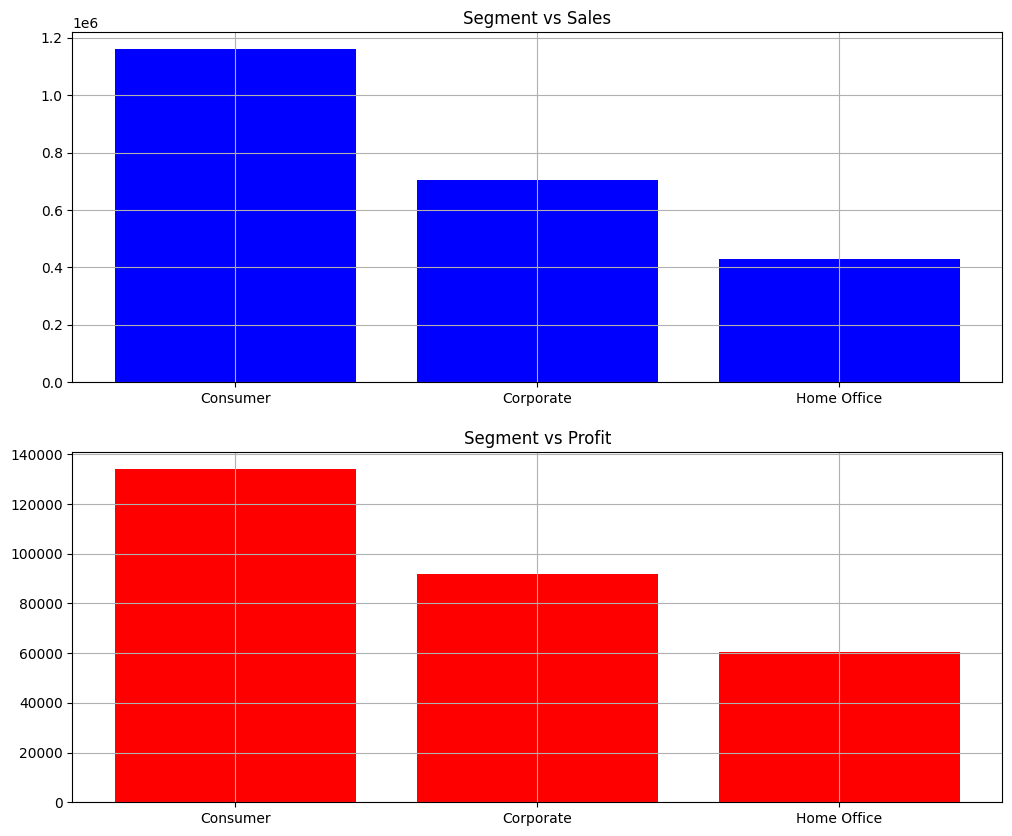

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

axes[0].bar(segment_sales['Segment'], segment_sales['Sales'], color='blue')
axes[0].set_title('Segment vs Sales')
axes[0].grid(True)

axes[1].bar(segment_profit['Segment'], segment_profit['Profit'], color='red')
axes[1].set_title('Segment vs Profit')
axes[1].grid(True)

plt.show()


the Consumer Segment was the highest segment for sales and profit   
and the Least Segment for Sales and profit was The Home Offic Segment

### Country, City, State and Region Analysis 

In [23]:
print('The number of unique values for country feature is ', df['Country'].nunique())
print('The number of unique values for region feature is ', df['Region'].nunique())
print('The number of unique values for city feature is ', df['City'].nunique())
print('The number of unique values for state feature is ', df['State'].nunique())


The number of unique values for country feature is  1
The number of unique values for region feature is  4
The number of unique values for city feature is  531
The number of unique values for state feature is  49


In [24]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

the Country Columns has just one vaue `United State`   
the all date collected from `United State`

In [25]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

There are four regions West, East, Central, South   
the most freauent region is West with 3203

In [26]:
region_sales = df.groupby(['Region'])['Sales'].sum().reset_index()
region_profit = df.groupby(['Region'])['Profit'].sum().reset_index()

print(region_sales, end='\n\n')
print(region_profit)

# print(region_sales.shape)
# print(region_profit.shape)


    Region        Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245

    Region       Profit
0  Central   39706.3625
1     East   91522.7800
2    South   46749.4303
3     West  108418.4489


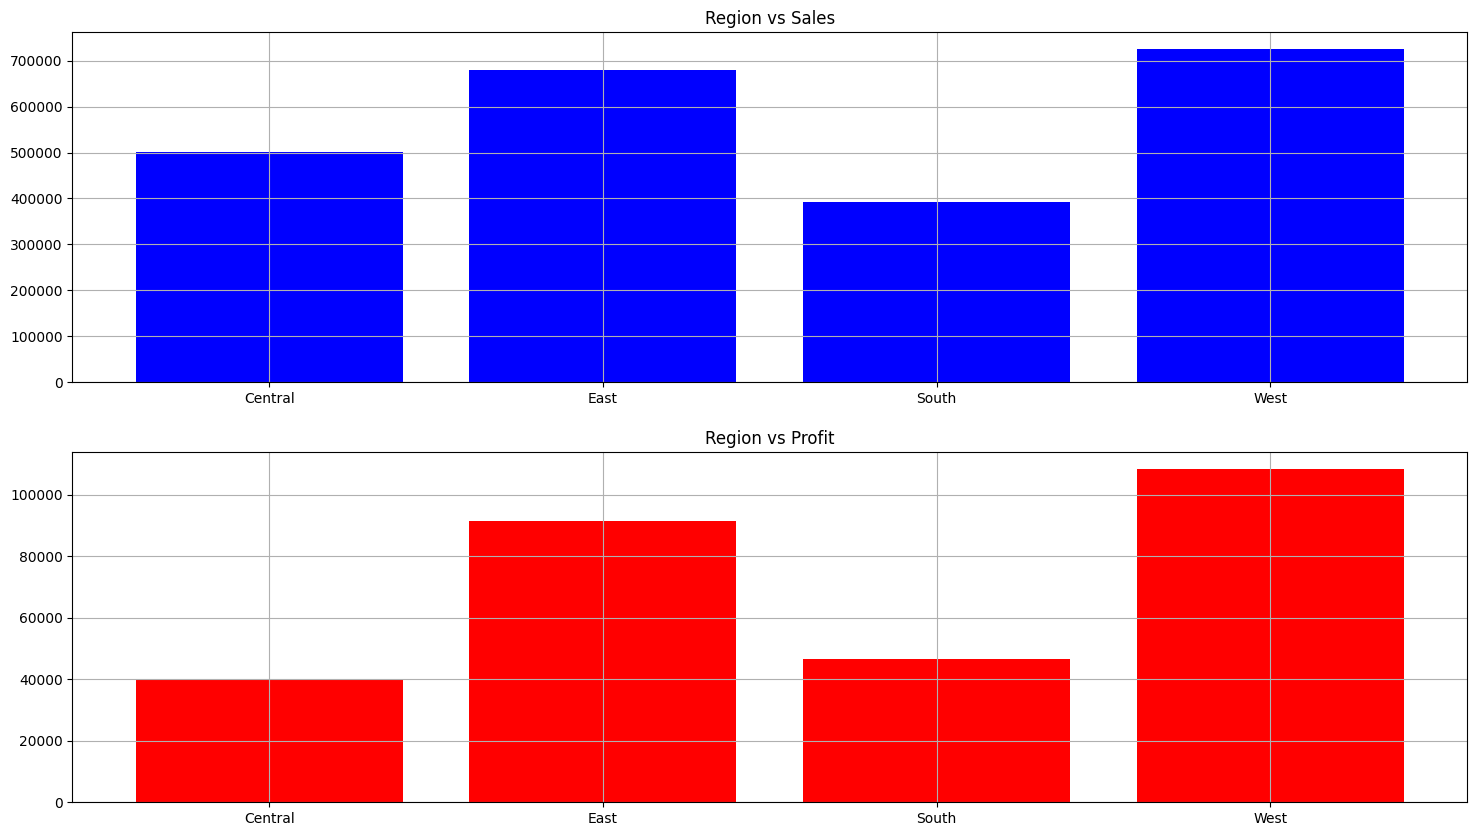

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))

axes[0].bar(region_sales['Region'], region_sales['Sales'], color='blue')
axes[0].set_title('Region vs Sales')
axes[0].grid(True)

axes[1].bar(region_profit['Region'], region_profit['Profit'], color='red')
axes[1].set_title('Region vs Profit')
axes[1].grid(True)

plt.show()


as showen the highest region in sales and progit is West   
although South is the least region in Sales it higher than central in the profit  
East in the area is above average in sales and profit

In [32]:
df['State'].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada  

the State column show that California is the most state frequent with 2001 it about the Double second row  
the Wyoming state is the least state it show just one time 

In [56]:
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()
state_Proft = df.groupby(['State'])['Profit'].sum().reset_index()

state_sales = state_sales.sort_values(by='Sales', ascending=False)
state_Proft = state_Proft.sort_values(by='Profit', ascending=False)


we will take the first 5 state and last 5 state from the Sales State and Profit State Df

In [58]:
top_state_sales = state_sales.head()
last_state_sales = state_sales.tail()

top_state_profit = state_Proft.head()
last_state_proft = state_Proft.tail()



In [59]:

print(f'\nTop State vs Sales\n',top_state_sales)
print(f'\nLast State vs Sales\n',last_state_sales)
print(f'\nTop State vs Profit\n',top_state_profit)
print(f'\nLast State vs Profit\n',last_state_proft)



Top State vs Sales
            State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140

Last State vs Sales
             State     Sales
48        Wyoming  1603.136
39   South Dakota  1315.560
17          Maine  1270.530
46  West Virginia  1209.824
32   North Dakota   919.910

Top State vs Profit
          State      Profit
3   California  76381.3871
30    New York  74038.5486
45  Washington  33402.6517
20    Michigan  24463.1876
44    Virginia  18597.9504

Last State vs Profit
              State      Profit
31  North Carolina  -7490.9122
11        Illinois -12607.8870
36    Pennsylvania -15559.9603
33            Ohio -16971.3766
41           Texas -25729.3563


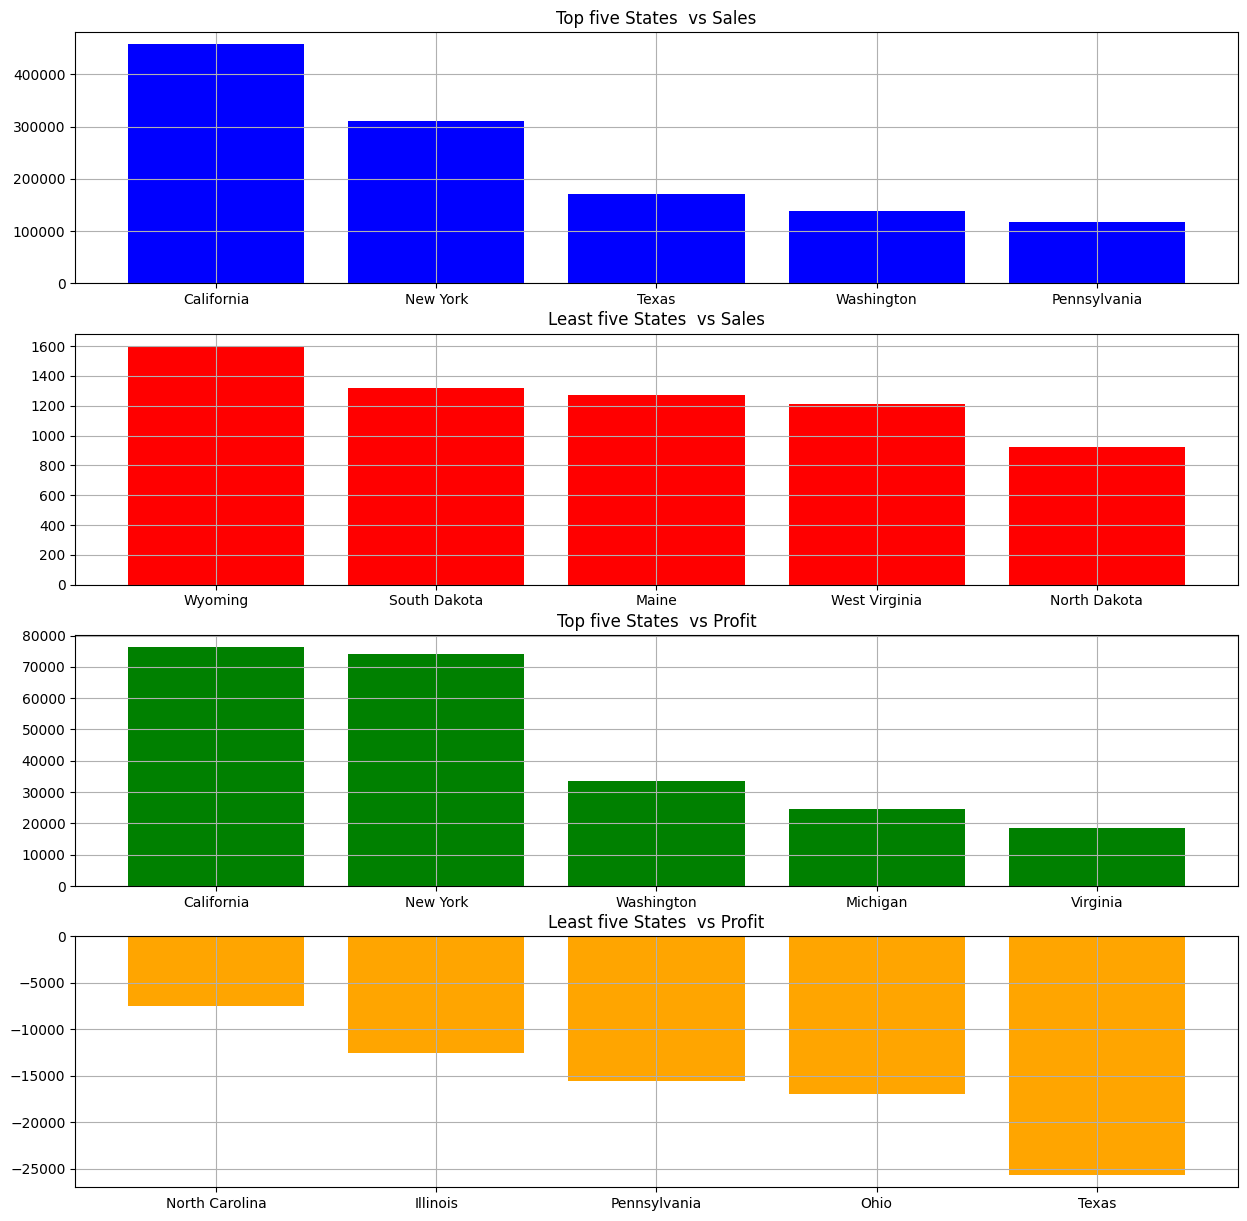

In [60]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

axes[0].bar(top_state_sales['State'], top_state_sales['Sales'], color='blue')
axes[0].set_title('Top five States  vs Sales')
axes[0].grid(True)

axes[1].bar(last_state_sales['State'], last_state_sales['Sales'], color='red')
axes[1].set_title('Least five States  vs Sales')
axes[1].grid(True)

axes[2].bar(top_state_profit['State'], top_state_profit['Profit'], color='green')
axes[2].set_title('Top five States  vs Profit')
axes[2].grid(True)

axes[3].bar(last_state_proft['State'], last_state_proft['Profit'], color='orange')
axes[3].set_title('Least five States  vs Profit')
axes[3].grid(True)

plt.show()


in the top five states vs sales show that and top five states vs profit
- California is the highest State in sales and profit and New York also has about more than the half sales of California  
but it almost the same profit that maybe becase New York is a state has high prices

in the Least five states vs sales show that and Least five states vs profit
- North Dakota is the least state in sales but it's not exist in the least five state in profit  
the least 3 states in profit Taxes, Chio, Pennsylvenia also not exist in the least five profit  
that maybe as a disaster or low sales&high discount

In [66]:
df['City'].describe()

count              9994
unique              531
top       New York City
freq                915
Name: City, dtype: object

the data collected from 531 city form United State  
New York City is the most frequent city

In [70]:
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()
city_profit = df.groupby(['City'])['Profit'].sum().reset_index()

city_sales = city_sales.sort_values(by='Sales', ascending=False)
city_profit = city_profit.sort_values(by='Profit', ascending=False)


print(city_sales)
print(city_profit)
    

              City       Sales
329  New York City  256368.161
266    Los Angeles  175851.341
452        Seattle  119540.742
438  San Francisco  112669.092
374   Philadelphia  109077.013
..             ...         ...
354   Ormond Beach       2.808
370      Pensacola       2.214
221        Jupiter       2.064
140         Elyria       1.824
1          Abilene       1.392

[531 rows x 2 columns]
              City      Profit
329  New York City  62036.9837
266    Los Angeles  30440.7579
452        Seattle  29156.0967
438  San Francisco  17507.3854
123        Detroit  13181.7908
..             ...         ...
80         Chicago  -6654.5688
241      Lancaster  -7239.0684
434    San Antonio  -7299.0502
207        Houston -10153.5485
374   Philadelphia -13837.7674

[531 rows x 2 columns]


In [71]:
top_city_sales = city_sales.head(10)
last_city_sales = city_sales.tail(10)

top_city_profit = city_profit.head(10)
last_city_proft = city_profit.tail(10)



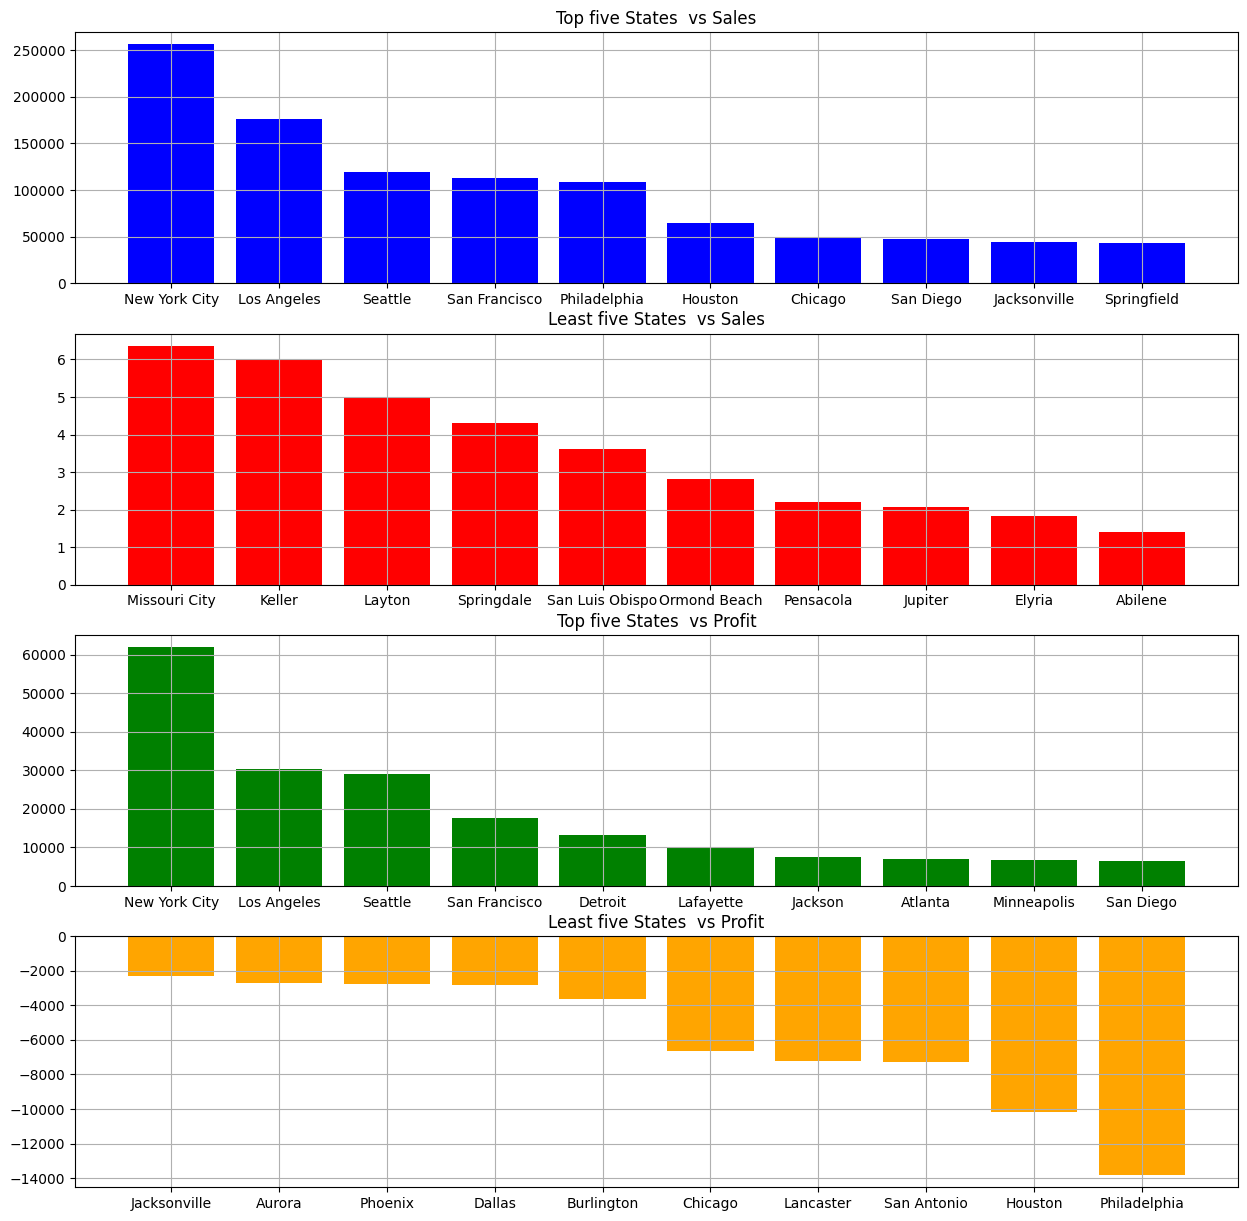

In [72]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

axes[0].bar(top_city_sales['City'], top_city_sales['Sales'], color='blue')
axes[0].set_title('Top five City  vs Sales')
axes[0].grid(True)

axes[1].bar(last_city_sales['City'], last_city_sales['Sales'], color='red')
axes[1].set_title('Least five City  vs Sales')
axes[1].grid(True)

axes[2].bar(top_city_profit['City'], top_city_profit['Profit'], color='green')
axes[2].set_title('Top five City  vs Profit')
axes[2].grid(True)

axes[3].bar(last_city_proft['City'], last_city_proft['Profit'], color='orange')
axes[3].set_title('Least five City  vs Profit')
axes[3].grid(True)

plt.show()


as shown 
- New York City is the highest city in sales and profit followed by Los Angeles, Seattle, San Francisco and Detroit in the Sales and profit
- Abilene, Elyria, Jupiter and Pensacola is the least cities in sales but Philadelphia, Houston, San Antonio, Lancaster and Chicago  
is the Least cities in profit the reaso is the same in State analysis  
the loss in Philadelphia is very high about 14000 

### Category & Sub-Category Analysis

In [84]:
df['Category'].describe()

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [87]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

The Category column contain just three categories  
- Office Supplies with 6026 frequent (Top Frequent)
- Furniture with 2121 frequent  
- Technology with 1847 frequent  

In [91]:
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
category_profit = df.groupby(['Category'])['Profit'].sum().reset_index()

category_sales = category_sales.sort_values(by='Sales', ascending=False)
category_profit = category_profit.sort_values(by='Profit', ascending=False)

print(category_sales,end='\n\n')
print(category_profit)


          Category        Sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320

          Category       Profit
2       Technology  145454.9481
1  Office Supplies  122490.8008
0        Furniture   18451.2728


as shown
- the Technology category is the highest category in sales with sum 836154.0330 and profit with sum 145454.9481
- and Furniture is the secend sales category with sum 741999.7953 but it in the least profit with sum 18451.2728
- and Office Supplies is the least sales category wth sum 719047.0320 but it in the secend profit with sum 122490.8008
- Furniture and Office Supplies is almost the same sales sum but there is very wide gab in profit 

In [96]:
print(df['Sub-Category'].describe())
print(df['Sub-Category'].nunique())

count        9994
unique         17
top       Binders
freq         1523
Name: Sub-Category, dtype: object
17


In [95]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

There is 17 sub-category in sub-category column  
the most frequent sub-category is Binders with 1523 frequent and the secend is Paper with 1370 frequent  
the least frequent sub-category is Copiers with 86 frequen

In [100]:
sub_category_sales = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
sub_category_profit = df.groupby(['Sub-Category'])['Profit'].sum().reset_index()

sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending=False)
sub_category_profit = sub_category_profit.sort_values(by='Profit', ascending=False)

print(sub_category_sales, end='\n\n')
print(sub_category_profit)


   Sub-Category        Sales
13       Phones  330007.0540
5        Chairs  328449.1030
14      Storage  223843.6080
16       Tables  206965.5320
3       Binders  203412.7330
11     Machines  189238.6310
0   Accessories  167380.3180
6       Copiers  149528.0300
4     Bookcases  114879.9963
1    Appliances  107532.1610
9   Furnishings   91705.1640
12        Paper   78479.2060
15     Supplies   46673.5380
2           Art   27118.7920
7     Envelopes   16476.4020
10       Labels   12486.3120
8     Fasteners    3024.2800

   Sub-Category      Profit
6       Copiers  55617.8249
13       Phones  44515.7306
0   Accessories  41936.6357
12        Paper  34053.5693
3       Binders  30221.7633
5        Chairs  26590.1663
14      Storage  21278.8264
1    Appliances  18138.0054
9   Furnishings  13059.1436
7     Envelopes   6964.1767
2           Art   6527.7870
10       Labels   5546.2540
11     Machines   3384.7569
8     Fasteners    949.5182
15     Supplies  -1189.0995
4     Bookcases  -3472.5560
1

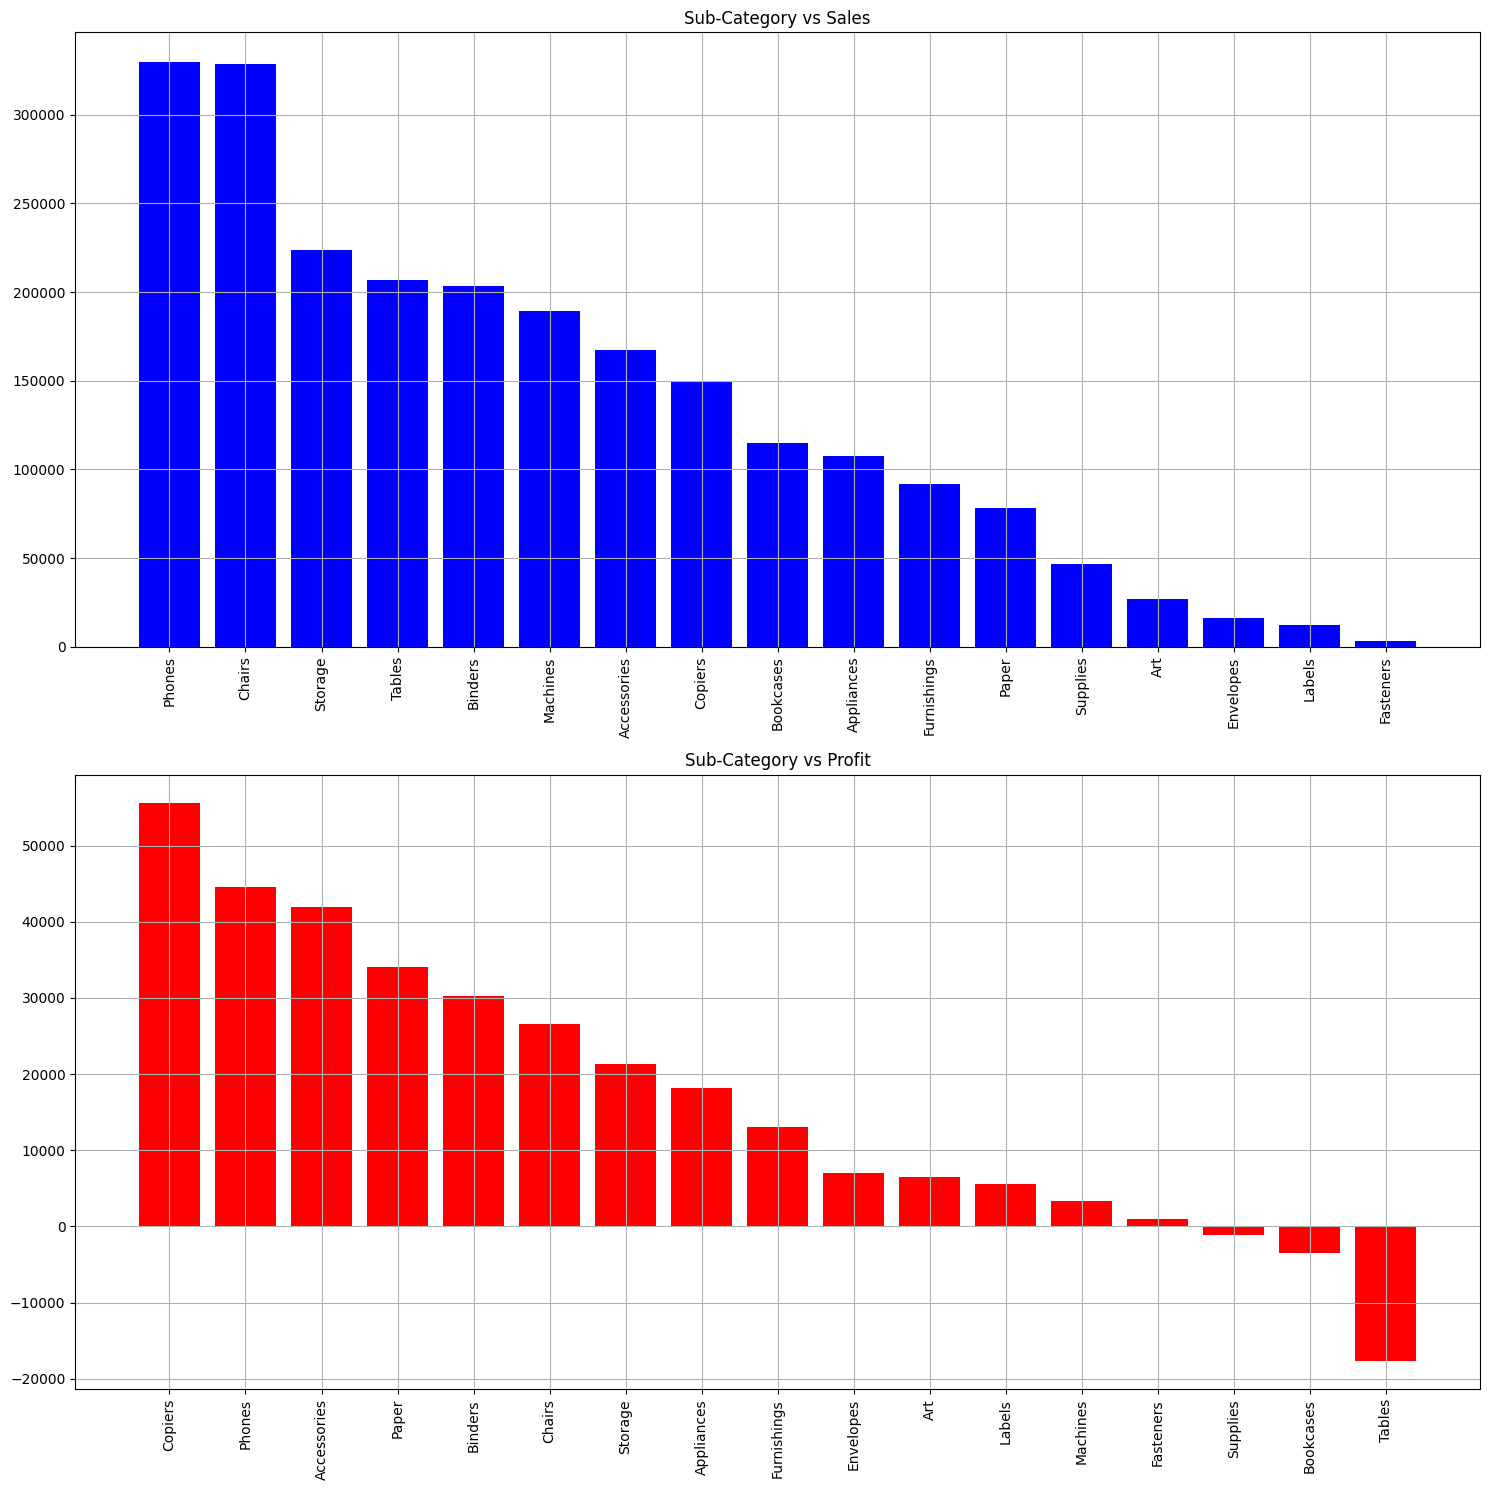

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].bar(sub_category_sales['Sub-Category'], sub_category_sales['Sales'], color='blue')
axes[0].set_title('Sub-Category vs Sales')
axes[0].set_xticklabels(sub_category_sales['Sub-Category'], rotation=90)
axes[0].grid(True)

axes[1].bar(sub_category_profit['Sub-Category'], sub_category_profit['Profit'], color='red')
axes[1].set_title('Sub-Category vs Profit')
axes[1].set_xticklabels(sub_category_profit['Sub-Category'], rotation=90)
axes[1].grid(True)


plt.tight_layout()
plt.show()


- Phonens nad Chairs is the highst sub-category in sales but Copiers is the highest profit and Phonens in the secend
- Supplies, Bookcases and Tables have negative profit(loss)
- Fasteners, Labels and Envelopes is the least sub-category in sales
- Tables is the least sub-category in profit with loss about -17725.4811
- the Bookcases is Before the latest in profit with profit -3472.5560

## Quantity Analysis

In [110]:
print(df['Quantity'].value_counts())
print(df['Quantity'].nunique())

Quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64
14


In [111]:
df['Quantity'].describe()

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

there are 14 quanitye form 1 to 14  
the most quantity frequent is 3 nad 2 

In [116]:
quantity_sales = df.groupby(['Quantity'])['Sales'].sum().reset_index()
quantity_profit = df.groupby(['Quantity'])['Profit'].sum().reset_index()

quantity_sales = quantity_sales.sort_values(by='Sales', ascending=False)
quantity_profit = quantity_profit.sort_values(by='Profit', ascending=False)

print(quantity_sales,end='\n\n')
print(quantity_profit)


    Quantity        Sales
2          3  422060.6007
4          5  415661.6965
3          4  323670.9944
1          2  289091.4798
6          7  239908.3659
5          6  207122.3214
8          9  128505.5901
7          8  117760.1760
0          1   53251.9345
12        13   32338.1890
9         10   24056.6640
10        11   15772.4820
11        12   14868.4080
13        14   13131.9580

    Quantity      Profit
2          3  57015.5250
4          5  49516.5945
3          4  44223.3908
1          2  38448.4088
6          7  34286.9730
8          9  17687.8908
7          8  10856.7960
5          6  10325.4678
0          1   7440.4801
12        13   6348.9010
10        11   4293.3671
13        14   2724.0038
9         10   2044.1570
11        12   1185.0660


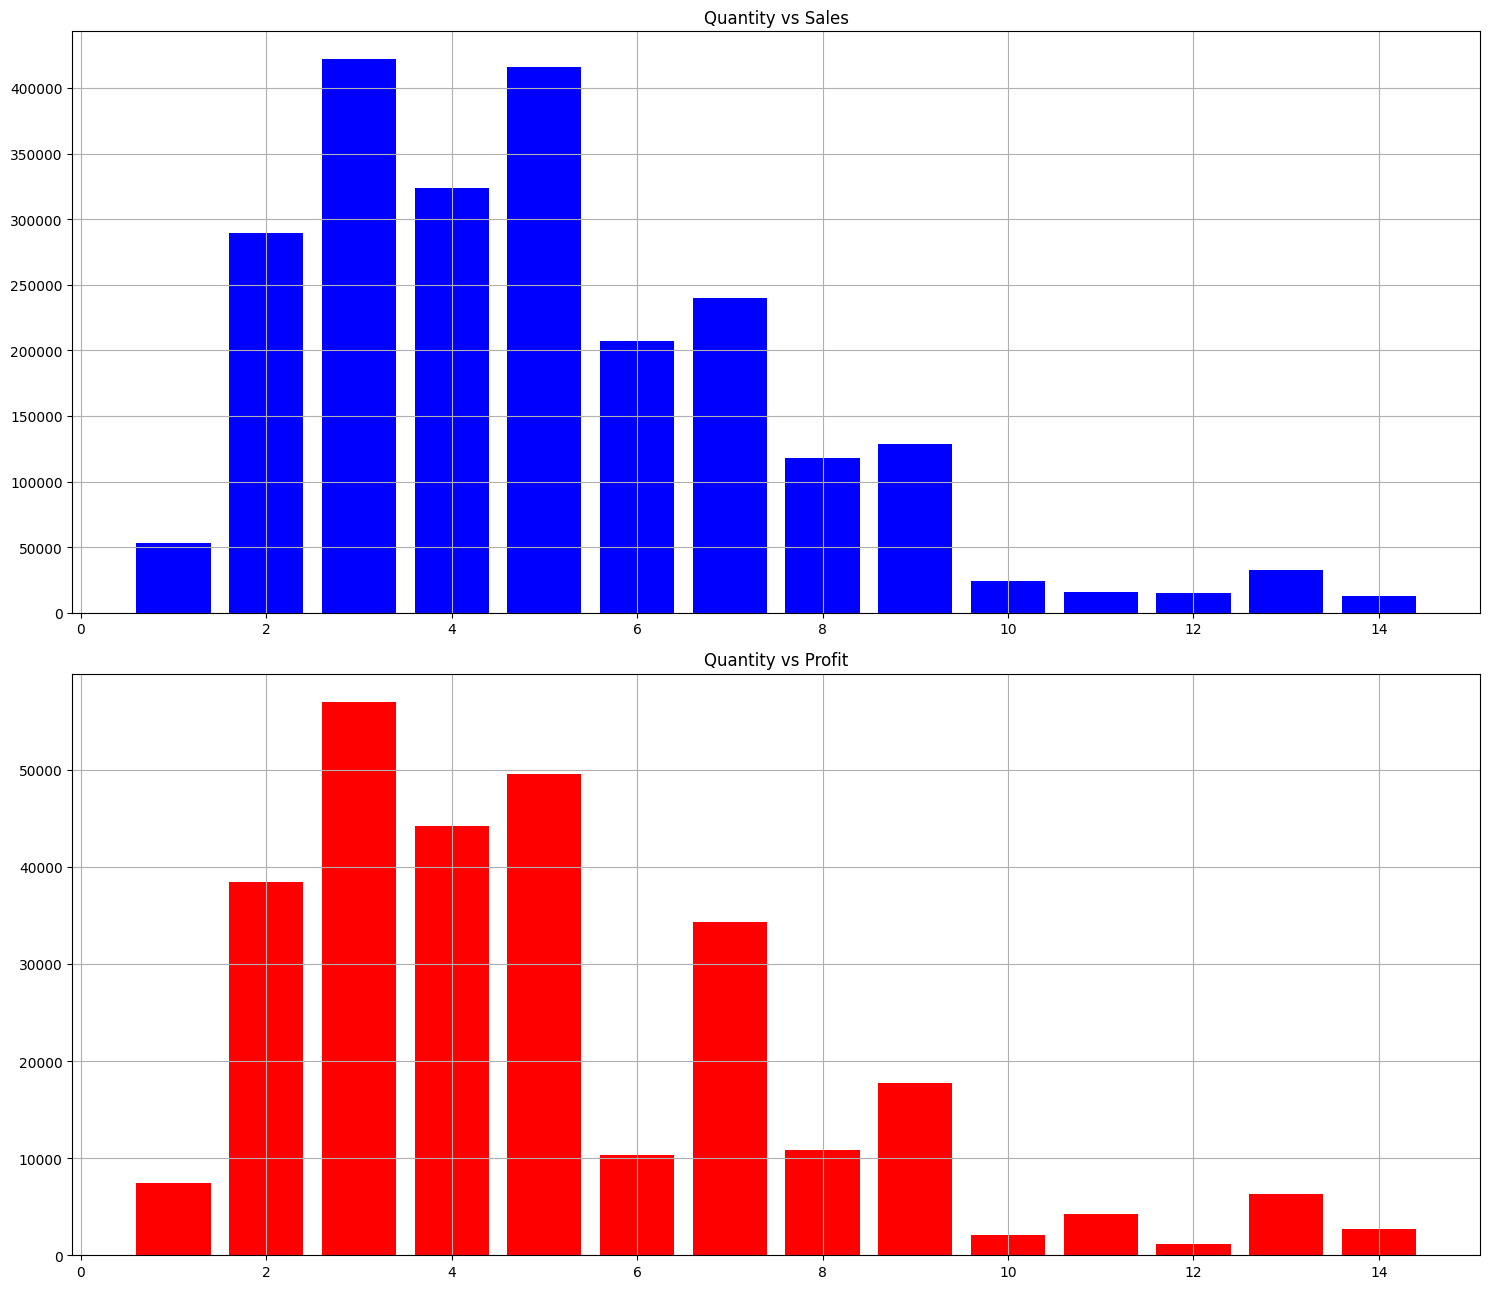

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 13))

axes[0].bar(quantity_sales['Quantity'], quantity_sales['Sales'], color='blue')
axes[0].set_title('Quantity vs Sales')
axes[0].grid(True)

axes[1].bar(quantity_profit['Quantity'], quantity_profit['Profit'], color='red')
axes[1].set_title('Quantity vs Profit')
axes[1].grid(True)


plt.tight_layout()
plt.show()


the figure show
- the store achieve the highest sum sales and profit when costumers buy 3 and 5 quantity 
- and the least sum sales and profit in 12 and 14 quantity

### Discount Analysis

In [133]:
print(df['Discount'].value_counts())
print(df['Discount'].nunique())


Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64
12


In [134]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

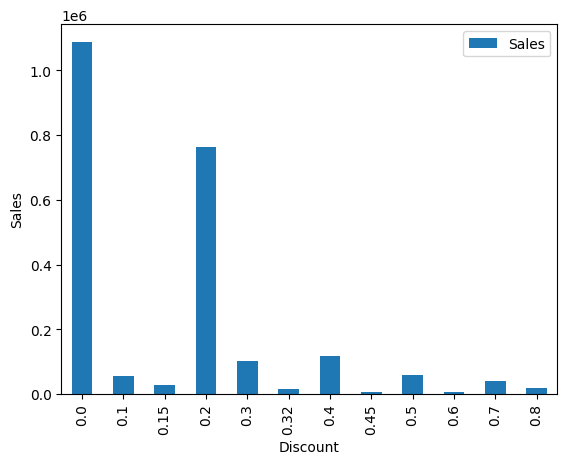

In [182]:
discount_group = df.groupby('Discount').sum(numeric_only=True)[["Sales"]]

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Sales")

plt.show()


The highest sales when there is no discounts (obvious)
the next higest sales when the discount = 0.2

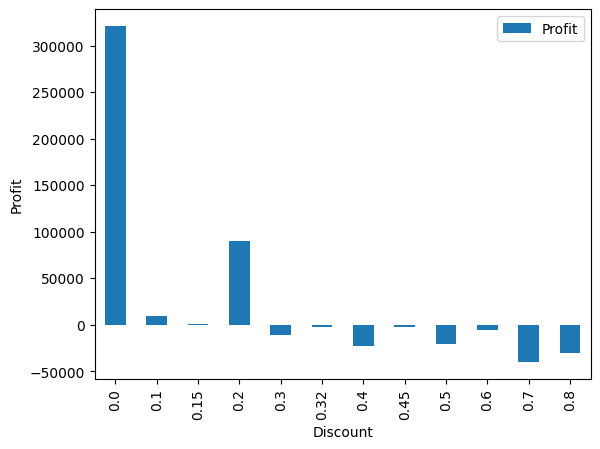

In [183]:
discount_group = df.groupby('Discount').sum(numeric_only=True)[["Profit"]]

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Profit")

plt.show()


The same as sales the highest profit when there is no discount   
and the next when discount = 0.2   
the least profit is when discount = 0.7 and 0.8

In [187]:
df['Product Name'].nunique()

1850

In [188]:
df['Product Name'].describe()

count                9994
unique               1850
top       Staple envelope
freq                   48
Name: Product Name, dtype: object

In [189]:
df['Product Name'].value_counts()

Product Name
Staple envelope                                                            48
Staples                                                                    46
Easy-staple paper                                                          46
Avery Non-Stick Binders                                                    20
Staples in misc. colors                                                    19
                                                                           ..
Xiaomi Mi3                                                                  1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts     1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room                           1
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                          1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                      1
Name: count, Length: 1850, dtype: int64

In [194]:
product_sales = df.groupby(['Product Name'])['Sales'].sum().reset_index()
product_profit = df.groupby(['Product Name'])['Profit'].sum().reset_index()

product_sales = product_sales.sort_values(by='Sales', ascending=False)
product_profit = product_profit.sort_values(by='Profit', ascending=False)


print(product_sales, end='\n\n')
print(product_profit)
    

                                           Product Name      Sales
404               Canon imageCLASS 2200 Advanced Copier  61599.824
650   Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
444   Cisco TelePresence System EX90 Videoconferenci...  22638.480
786        HON 5400 Series Task Chairs for Big and Tall  21870.576
686          GBC DocuBind TL300 Electric Binding System  19823.479
...                                                 ...        ...
253   Avery Hi-Liter Pen Style Six-Color Fluorescent...      7.700
784                                 Grip Seal Envelopes      7.072
1793                                           Xerox 20      6.480
208                                             Avery 5      5.760
605   Eureka Disposable Bags for Sanitaire Vibra Gro...      1.624

[1850 rows x 2 columns]

                                          Product Name      Profit
404              Canon imageCLASS 2200 Advanced Copier  25199.9280
650  Fellowes PB500 Electric Punch P

In [219]:
product_sales.head()

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479


In [220]:
product_sales.tail()

,Product Name,Sales
253,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
784,Grip Seal Envelopes,7.072
1793,Xerox 20,6.480
208,Avery 5,5.760
605,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624


In [221]:
product_profit.head()

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766


In [222]:
product_profit.tail()

,Product Name,Profit
376,Bush Advantage Collection Racetrack Conference...,-1934.3976
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156
476,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
985,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
475,Cubify CubeX 3D Printer Double Head Print,-8879.9704


## Some Qustions

● What are the top selling products in the superstore?

- the top selling product in the superstore is   
-- Canon imageCLASS 2200 Advanced Copier  -> ***61599.824***  
-- Fellowes PB500 Electric Punch Plastic Comb  -> ***27453.384***  
-- Cisco TelePresence System EX90 Videoconferenci...  -> ***22638.480***  
-- HON 5400 Series Task Chairs for Big and Tall -> ***21870.576***  
-- GBC DocuBind TL300 Electric Binding System -> ***19823.479***  

● Which category of products generates the highest revenue and profit?

- The category generate the highest revenue and profit is Technology with revenue 836154.0330 and profit 145454.9481

● Which region generates the most sales?


- Central is the Region that generate the most sales with sum = 501239.8908

● What is the impact of discounts and promotions on sales?


- with no discount or up to 0.2 discount the sales and profit is good but for high discount 0.7, 0.8 the profit is low

● What is the average profit margin for each product category?

In [223]:
Office_Supplies_profit = df[df['Category'] == 'Office Supplies']['Profit'].sum()
Office_Supplies_sales = df[df['Category'] == 'Office Supplies']['Sales'].sum()
Office_Supplies_avg = Office_Supplies_profit / Office_Supplies_sales
print('Office Supplies mergin is ',Office_Supplies_avg)

Furniture_profit = df[df['Category'] == 'Furniture']['Profit'].sum()
Furniture_sales = df[df['Category'] == 'Furniture']['Sales'].sum()
Furniture_avg = Furniture_profit / Furniture_sales
print('Furniture mergin is ',Furniture_avg)

Technology_profit = df[df['Category'] == 'Technology']['Profit'].sum()
Technology_sales = df[df['Category'] == 'Technology']['Sales'].sum()
Technology_avg = Technology_profit / Technology_sales
print('Technology mergin is ', Technology_avg)

Office Supplies mergin is  0.1703515839002865
Furniture mergin is  0.024866951334588872
Technology mergin is  0.17395712076891937


● Which sub-category of products has the highest demand?


- Phones and chairs is the sub-category with highest cemand